# **TASK 3 : Data Exploration with Sample SuperStore Dataset**



**Author: Deep Navagamiya**

The objective is to conduct an Exploratory Data Analysis (EDA) on the Sample Superstore dataset and identify areas of weakness where improvements can be made to enhance profitability.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# **Importing Dataset**

In [8]:
# Define the file path
file_path = "/content/SampleSuperstore.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Display the first three rows of the DataFrame
df.head(3)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0.0,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.62,2,0.0,6.8714


# **Data Examination**

In [9]:
df.shape

(9994, 13)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [11]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [12]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [14]:
# Checking null values
pd.DataFrame(df.isnull().sum(),columns=['No. of missing values'])

,No. of missing values
Ship Mode,0
Segment,0
Country,0
City,0
State,0
Postal Code,0
Region,0
Category,0
Sub-Category,0
Sales,0


In [15]:
# Identify Distinct Values in the Dataset
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

# **Data Cleaning**

**Excluding the country column**

In [16]:
# Remove the "Country" column from the DataFrame
df = df.drop(columns=["Country"])

In [17]:
df.duplicated()
df.head(10)

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [18]:
df.duplicated().sum()

17

In [19]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [20]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [21]:
df['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [22]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [23]:
data = df.drop_duplicates(keep='first')

In [28]:
dt = df.sort_values(by='Sales', ascending=False)

In [29]:
dt.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2697,Standard Class,Home Office,Jacksonville,Florida,32216,South,Technology,Machines,22638.480,6,0.5,-1811.0784
6826,Standard Class,Corporate,Lafayette,Indiana,47905,Central,Technology,Copiers,17499.950,5,0.0,8399.9760
8153,First Class,Consumer,Seattle,Washington,98115,West,Technology,Copiers,13999.960,4,0.0,6719.9808
2623,First Class,Home Office,New York City,New York,10024,East,Technology,Copiers,11199.968,4,0.2,3919.9888
4190,Standard Class,Consumer,Newark,Delaware,19711,East,Technology,Copiers,10499.970,3,0.0,5039.9856


In [30]:
dt.shape

(9994, 12)

# **Data Exploration and Analysis**

#Data Visualization

Exploring data patterns by creating a pairplot for each column.

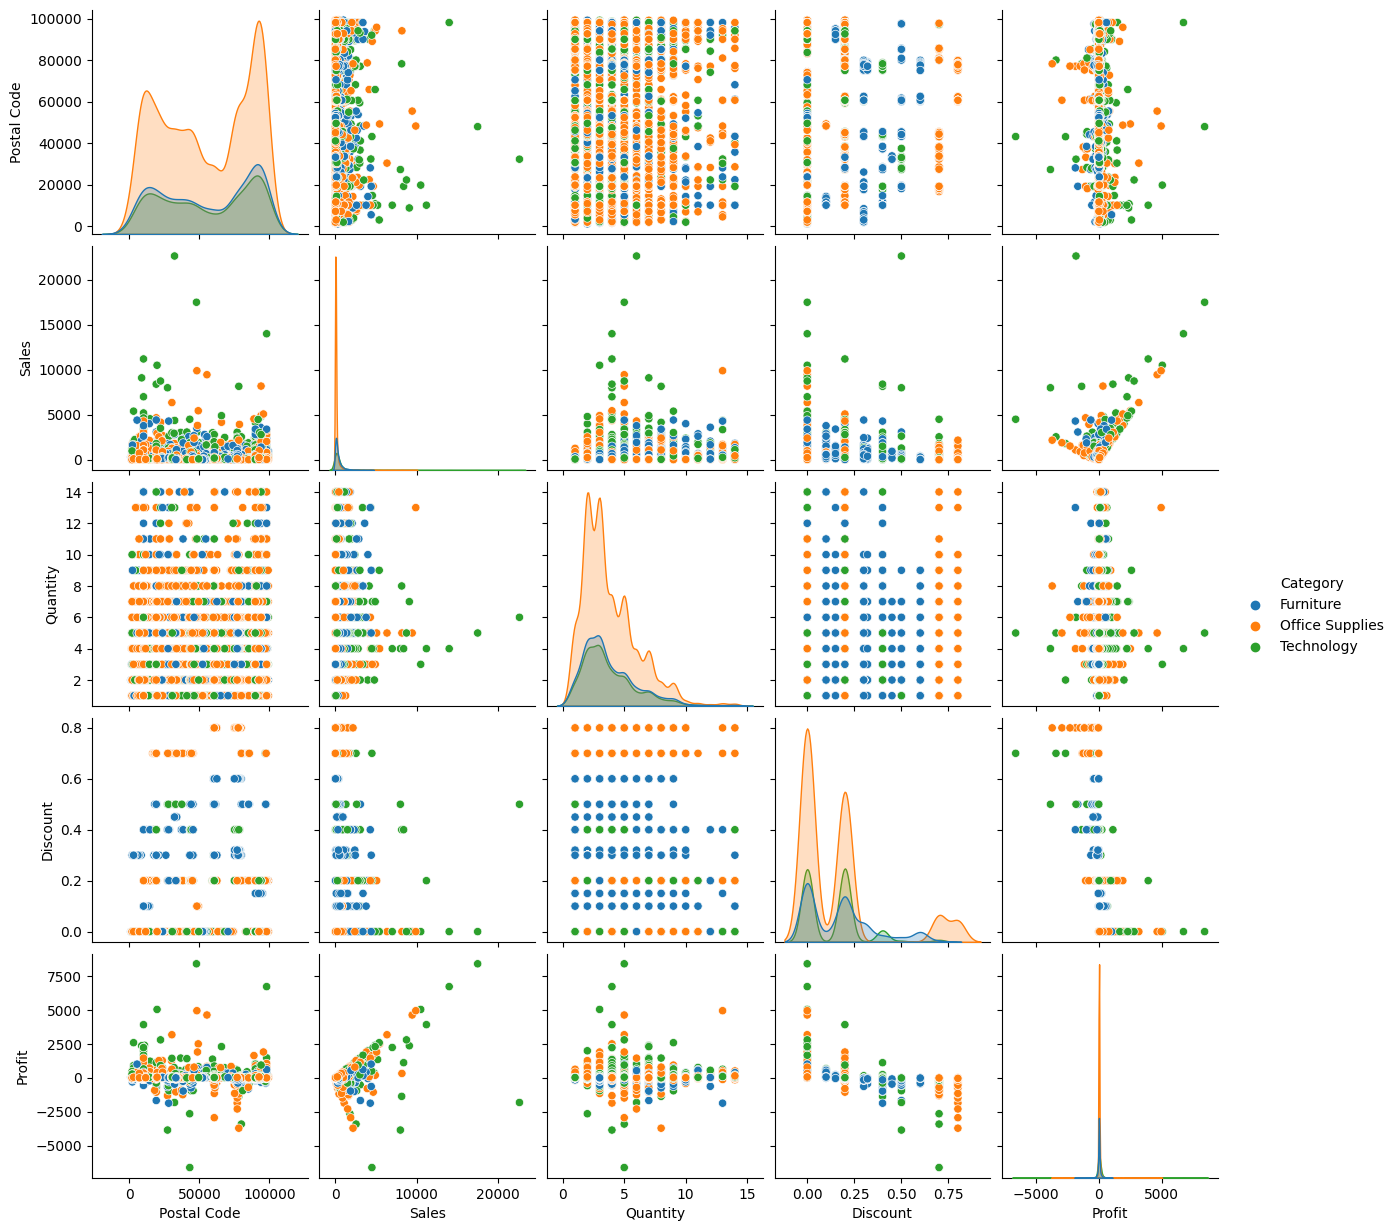

In [31]:
# Create a pairplot with the 'Category' variable as hue
sns.pairplot(data=df, hue="Category")

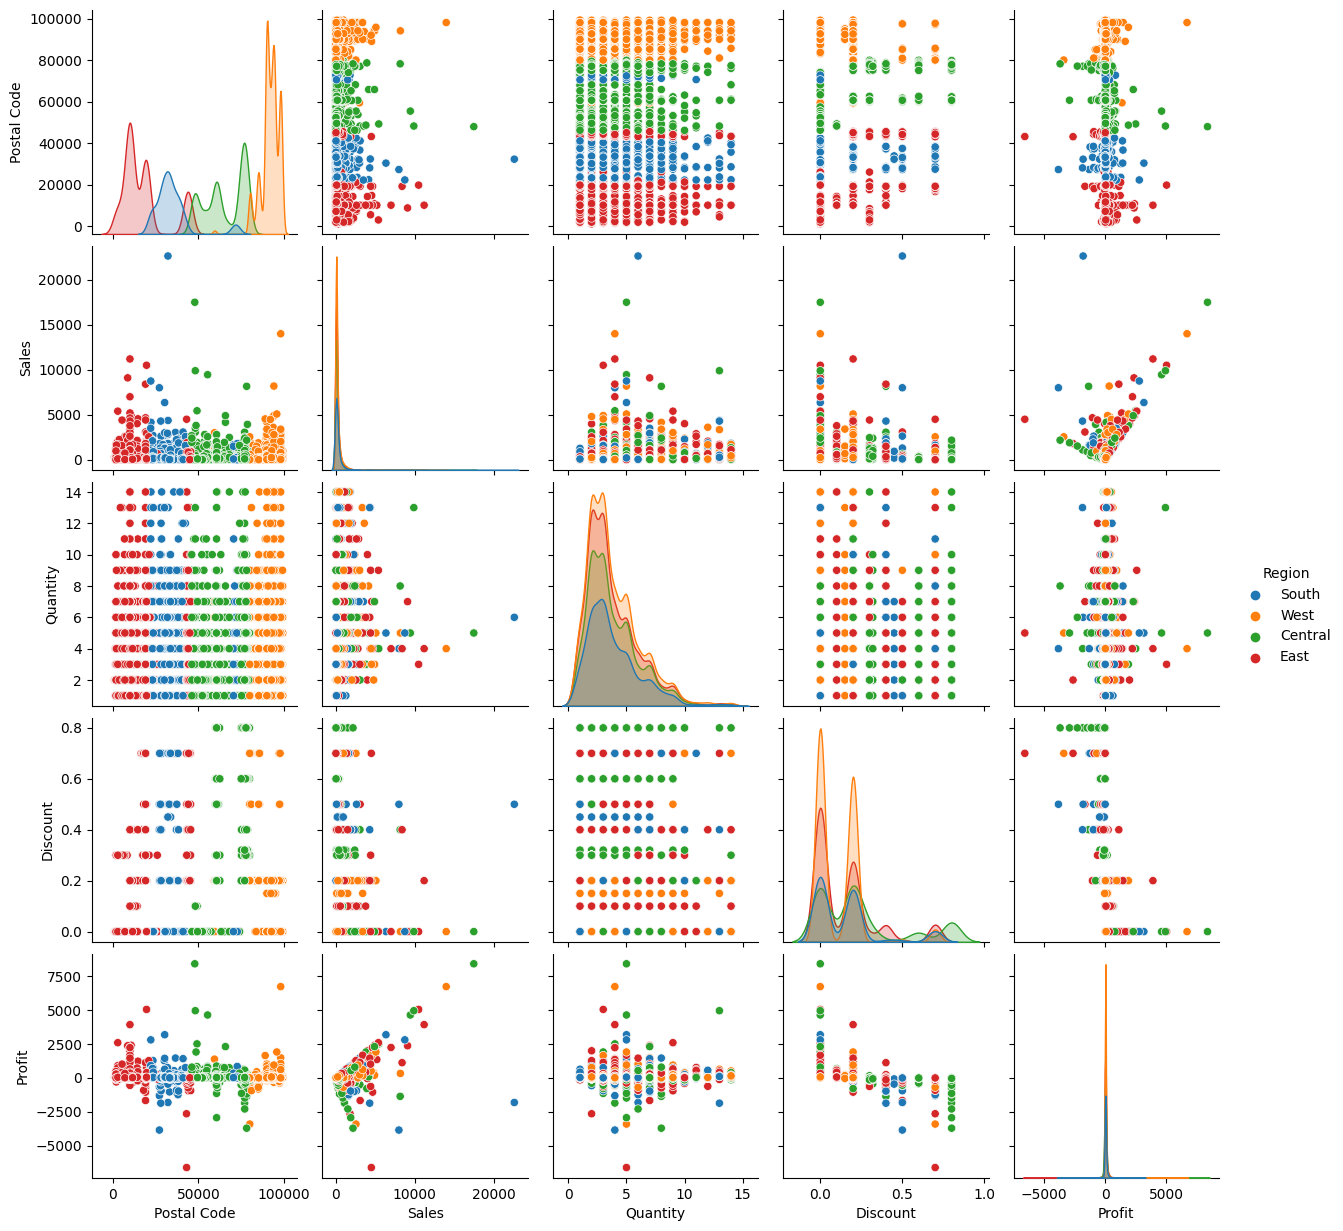

In [32]:
# Generate a pairplot with the 'Region' variable as hue
sns.pairplot(data=df, hue="Region")

In [36]:
# Calculate the correlation matrix
correlation_matrix = df.corr()
correlation_matrix

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


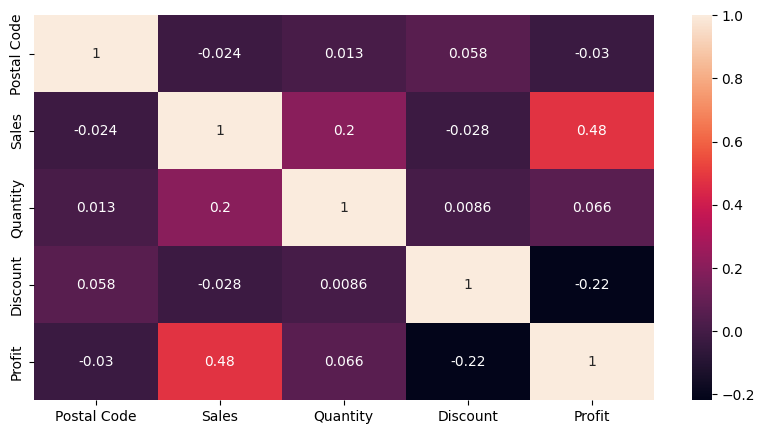

In [37]:
# Create a heatmap to visualize the correlation matrix
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
sns.heatmap(data=df.corr(), annot=True)
plt.show()

**The brightest colors in the heatmap represent a strong positive correlation, while dark colors indicate little to no correlation.**

**The heatmap above reveals the following correlations:**

- Sales and Profit exhibit a moderate positive correlation.
- Discount and Profit display a negative correlation.
- Quantity and Profit show a less moderate positive correlation.

**It appears that Profit is positively correlated with Sales.**

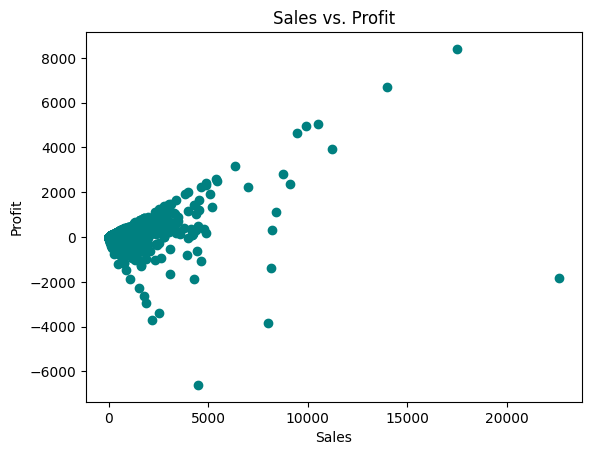

In [38]:
# Create a scatter plot of Sales vs. Profit
plt.scatter(x=df['Sales'], y=df['Profit'], c='Teal')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Sales vs. Profit')
plt.show()

When sales are low, a company may either incur a profit or a loss. However, when sales are high, the company tends to consistently generate a profit.

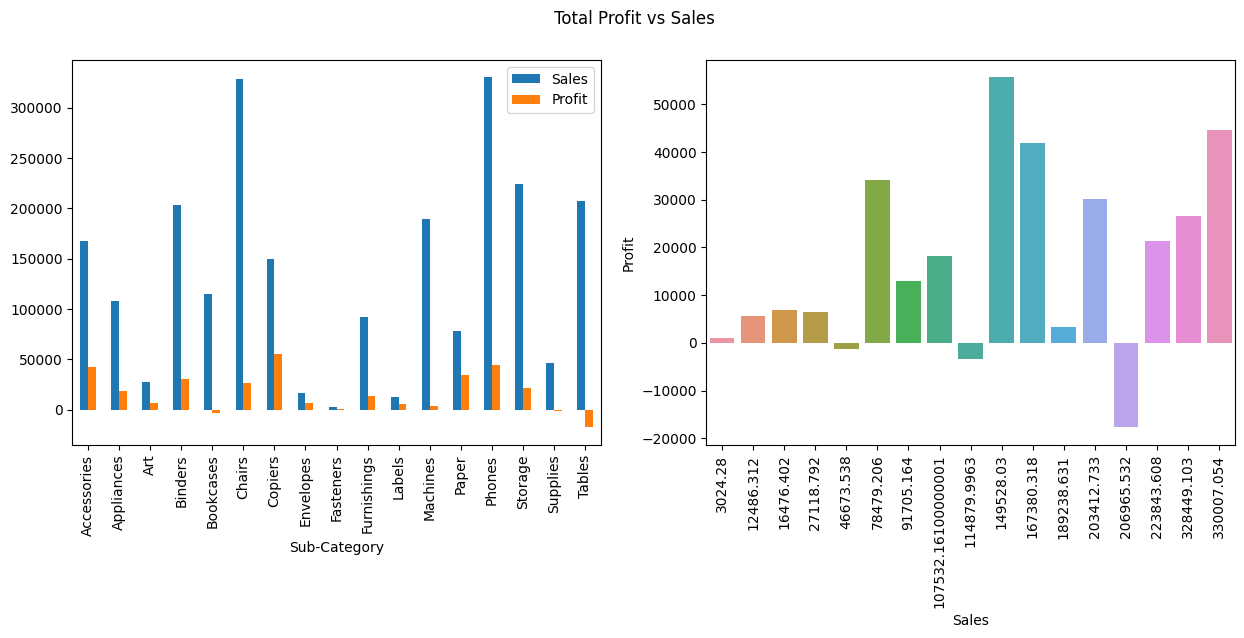

In [39]:
# Create a subplot with two side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Total Profit vs Sales")

# Plot the aggregated sales and profit using Seaborn
sns.barplot(data=df.groupby('Sub-Category')['Sales', 'Profit'].agg(sum), x='Sales', y='Profit', ax=axes[1], dodge=False)

# Plot the aggregated sales and profit using Matplotlib
df.groupby('Sub-Category')['Sales', 'Profit'].agg(sum).plot(kind='bar', ax=axes[0])

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plots
plt.show()

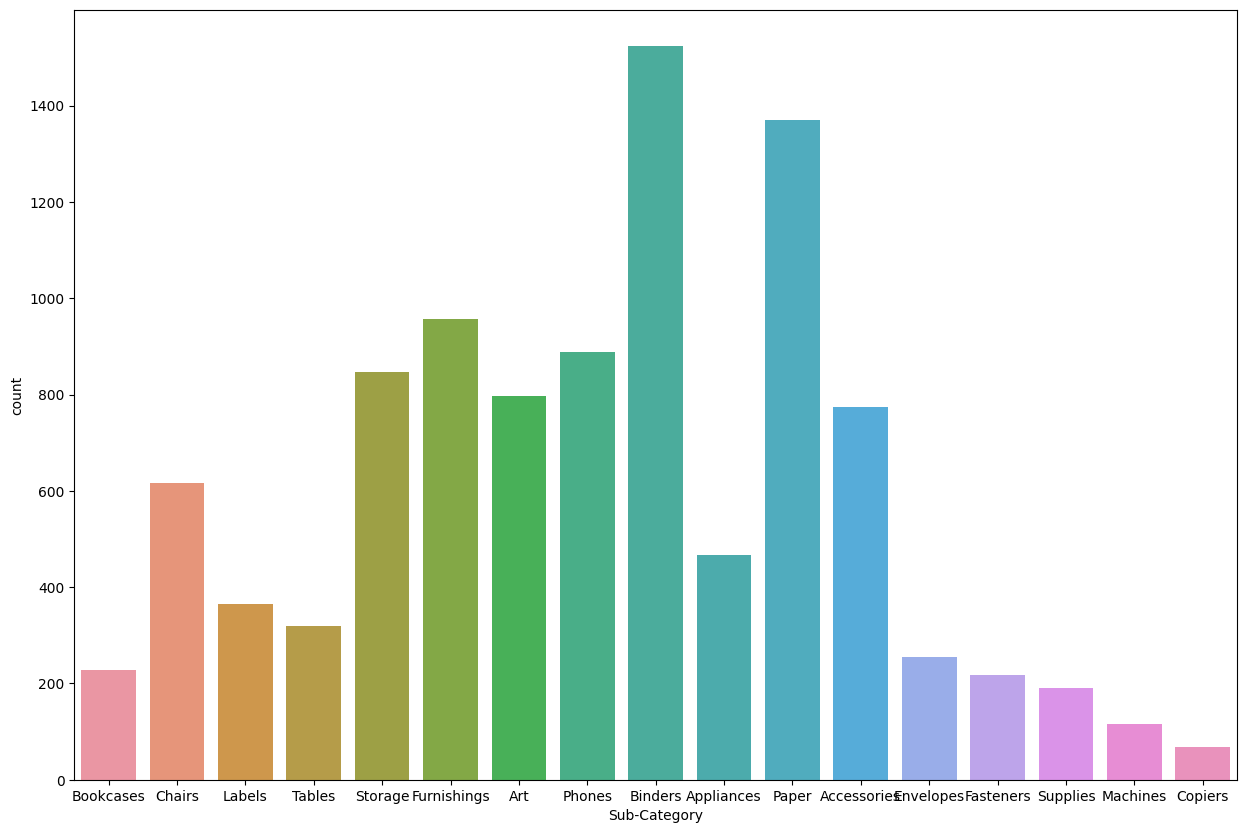

In [40]:
# Set the figure size
plt.figure(figsize=(15, 10))

# Create a countplot to visualize the distribution of sub-categories
sns.countplot(data=df, x='Sub-Category')

# Show the plot
plt.show()

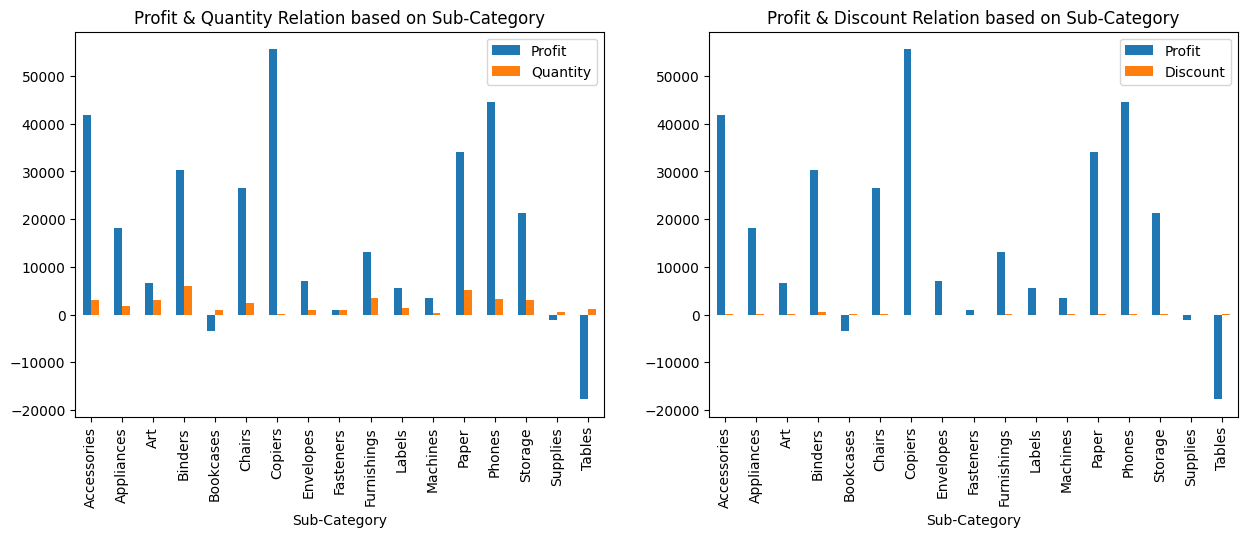

In [41]:
# Create a subplot with two side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot the aggregated Profit and Quantity relationship based on Sub-Category
df.groupby('Sub-Category')['Profit', 'Quantity'].agg(sum).plot(kind='bar', ax=axes[0])
axes[0].set_title('Profit & Quantity Relation based on Sub-Category')

# Plot the aggregated Profit and Discount relationship based on Sub-Category
df.groupby('Sub-Category')['Profit', 'Discount'].agg(sum).plot(kind='bar', ax=axes[1])
axes[1].set_title('Profit & Discount Relation based on Sub-Category')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plots
plt.show()

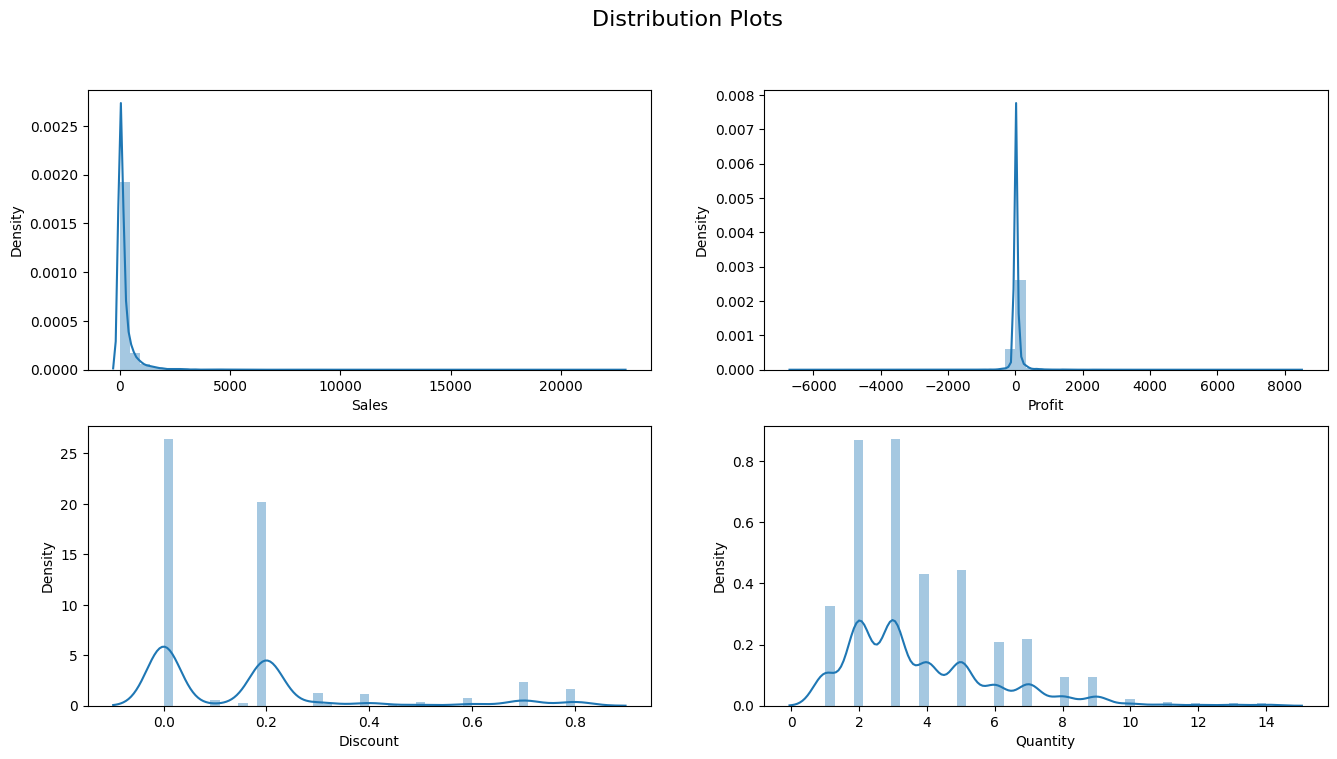

In [42]:
# Create a 2x2 subplot for distribution plots
fig, axes = plt.subplots(2, 2, figsize=(16, 8))
fig.suptitle("Distribution Plots", fontsize=16)

# Plot the distribution of Sales
sns.distplot(df['Sales'], ax=axes[0, 0])

# Plot the distribution of Profit
sns.distplot(df['Profit'], ax=axes[0, 1])

# Plot the distribution of Discount
sns.distplot(df['Discount'], ax=axes[1, 0])

# Plot the distribution of Quantity
sns.distplot(df['Quantity'], ax=axes[1, 1])

# Show the plots
plt.show()

The distribution plots reveal the following insights:

- The distribution of Sales is positively skewed (right-skewed).
- The distribution of Profit follows a normal distribution.

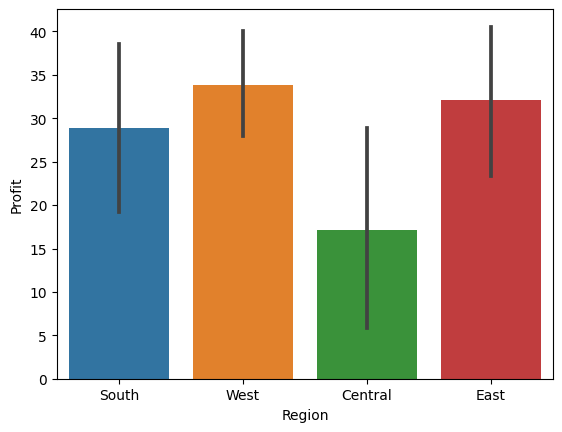

In [43]:
# Create a barplot showing Profit by Region
sns.barplot(x='Region', y='Profit', data=df)
plt.show()

The West and East regions reported higher profits, while the Central region had lower profits.

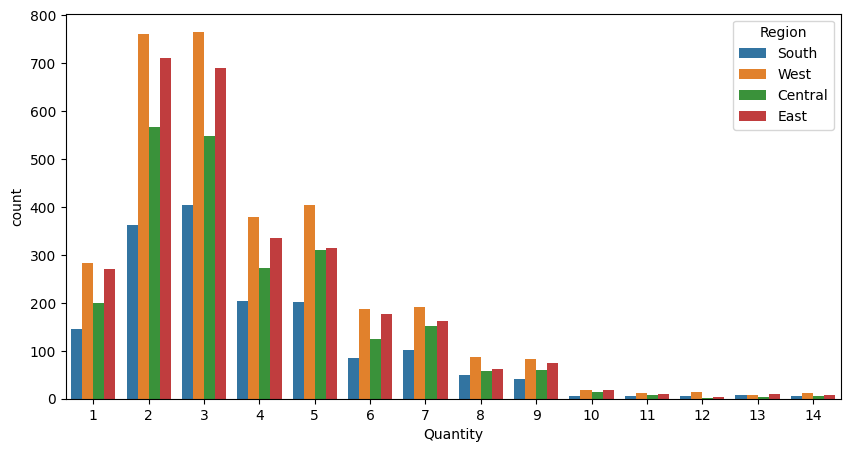

In [44]:
# Create a countplot to visualize Quantity by Region
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
sns.countplot(data=df, x='Quantity', hue='Region', ax=axes)
plt.show()

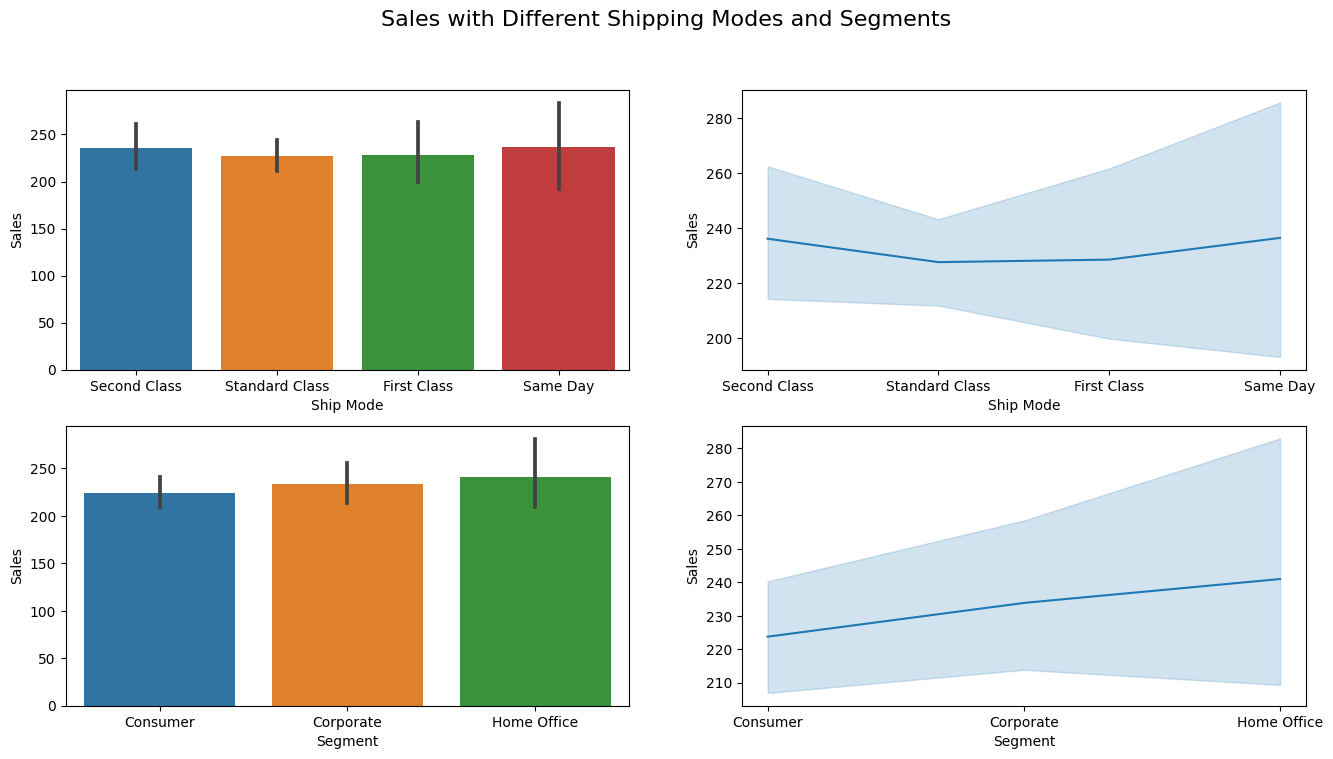

In [45]:
# Create a 2x2 subplot for visualizing Sales with different shipping modes and segments
fig, axes = plt.subplots(2, 2, figsize=(16, 8))
fig.suptitle("Sales with Different Shipping Modes and Segments", fontsize=16)

# Barplot for Sales by Ship Mode
sns.barplot(x=df['Ship Mode'], y=df['Sales'], ax=axes[0, 0], dodge=False)

# Lineplot for Sales by Ship Mode
sns.lineplot(x=df['Ship Mode'], y=df['Sales'], ax=axes[0, 1])

# Barplot for Sales by Segment
sns.barplot(x=df['Segment'], y=df['Sales'], ax=axes[1, 0])

# Lineplot for Sales by Segment
sns.lineplot(x=df['Segment'], y=df['Sales'], ax=axes[1, 1])

# Show the plots
plt.show()

# **In summary:**

- The correlation matrix indicates a positive relationship between Profit and Sales, as well as between Quantity and Sales.

- The company tends to offer higher discounts on Office Supplies and Furniture categories.

- In the Central Region, the company provides substantial discounts, but the output in terms of quantity is significantly lower. Consider reallocating the quantity to the Furniture category from Office Supplies.

- The most common quantity of products in demand falls within the range of 2-4 units.

- The mode of shipping does not appear to have a significant impact on sales.